importing Jupyter notebook from data_preprocessing.ipynb
Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Found 7178 files belonging to 7 classes.
Using 1435 files for validation.
['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
(64, 48, 48, 1)
(64,)
0.050980397 1.0


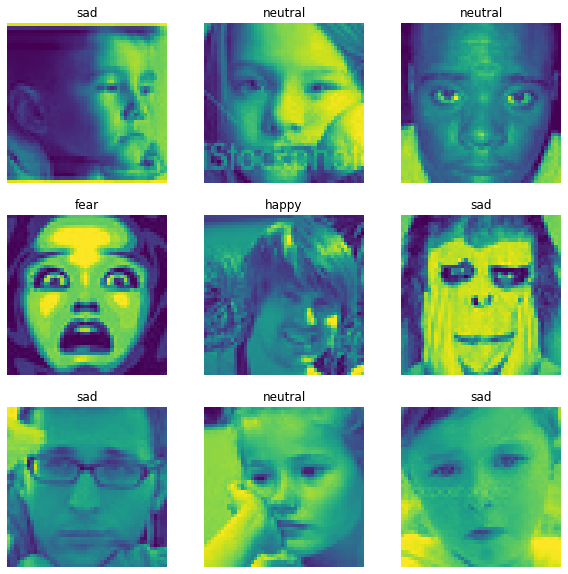

In [6]:
import tensorflow as tf
import import_ipynb
from tensorflow.keras import layers
from data_preprocessing import train_ds, val_ds

In [7]:
num_classes = 7

In [8]:
model = tf.keras.Sequential([
    layers.Conv2D(48, 3, activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(48, 3, activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(48, 3, activation="relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(2304, activation="softmax"),
    layers.Dense(num_classes)
])

In [9]:
model.compile(optimizer="adam", loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

In [ ]:
# 모델의 정확도가 오르지 않는 상황이 관측됨
model.fit(train_ds, validation_data=val_ds, epochs=100)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
359/359 [==============================] - ETA: 0s - loss: 1.8848 - accuracy: 0.2362WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D710700D90> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

359/359 [==============================] - 5s 14ms/step - loss: 1.8111 - accuracy: 0.2488 - val_loss: 1.8097 - val_accuracy: 0.2425
Epoch 44/100
359/359 [==============================] - 5s 14ms/step - loss: 1.8111 - accuracy: 0.2488 - val_loss: 1.8097 - val_accuracy: 0.2425
Epoch 45/100
359/359 [==============================] - 5s 15ms/step - loss: 1.8111 - accuracy: 0.2488 - val_loss: 1.8097 - val_accuracy: 0.2425
Epoch 46/100
359/359 [==============================] - 5s 15ms/step - loss: 1.8111 - accuracy: 0.2488 - val_loss: 1.8097 - val_accuracy: 0.2425
Epoch 47/100
359/359 [==============================] - 5s 15ms/step - loss: 1.8111 - accuracy: 0.2488 - val_loss: 1.8097 - val_accuracy: 0.2425
Epoch 48/100
359/359 [==============================] - 5s 15ms/step - loss: 1.8111 - accuracy: 0.2488 - val_loss: 1.8097 - val_accuracy: 0.2425
Epoch 49/100
359/359 [==============================] - 5s 14ms/step - loss: 1.8111 - accuracy: 0.2488 - val_loss: 1.8097 - val_accuracy: 0.242